In [48]:
# Linear calculation 
# Z = W.X + b
# A = σ(Z)
# For 1st layer,
# z1 = w1*x1 + w3*x2 + b11 = -0.1*0.1 + 0.2*0.3 + 0 = 0.05
# a1 = ReLU(0.05) = max(0,0.05) = 0.05
# z2 = w2*x1 + w4*x2 + b12 = 0.2*0.1 + -0.3*0.3 + 0 = -0.07
# a2 = ReLU(-0.07) = max(0,-0.07) = 0.0
# a1, a2 are the inputs to the 2nd layer.
# For the 2nd layer,
# z3 = w5*a1 + w6*a2 + b21 = 0.3*0.05 + -0.1*0.0 + 0 = 0.015
# a3 = Sigmoid(0.015) = 1/(1+e^(-z3)) = 0.504
# ŷ = a3

# Error: 

# Error E = -y log(ŷ)-(1-y)log(1-ŷ)
#         = -1*(log(0.504))-(1–1)(log(1–0.504))
#         = 0.2975

# Backward propagation: 
# For Output Layer,
# dE/dw5 = dE/da3 * da3/dz3 * dz3/dw5                          → eq.1
# dE/da3 = dE / dŷ = d (- y log(ŷ)-(1-y)log(1-ŷ)) / dŷ
#                   = -( y / ŷ) + ((1-y)/(1-ŷ))
#                   =- (1/0.504) + 0 = -1.985                  → eq.2
# da3/dz3 = d(1/(1+e^(-z3))) / dz3 = e^(-z3) / (1+e^(-z3))²
#                                  = 0.249                     → eq.3
# dz3/dw5 = d(w5*a1 + w6*a2 + b21)/dw5 = a1 = 0.05             → eq.4
# dE/dw5 = ᅀw5 = -1.985 * 0.249 * 0.05 = -0.0247          (from eq.1)
# Similarly for w6 and b2,
# dE/dw6 = dE/da3 * da3/dz3 * dz3/dw6                          → eq.5
# dz3/dw6 = d(w5*a1 + w6*a2 + b21)/dw6 = a2 = 0.0              → eq.6
# dE/dw6 = ᅀw6 = -1.985 * 0.249 * 0.0 = 0.0   (from eq.5, eq.2, eq.3)
# dE/ db21 = dE/da3 * da3/dz3 * dz3/db21
# dz3/db21 = d(w5*a1 + w6*a2 + b2)/db21 = 1
# dE/db21 = ᅀb21 = -1.985 * 0.249 *1 = -0.4942
# For Hidden layer,
# dE/dw1 = dE/da1 * da1/dz1 * dz1/dw1                          → eq.7
# dE/da1 = dE/z3 * dz3/da1 =(dE/da3 * da3/dz3) * dz3/da1       → eq.8
# ( If there are more nodes in the output layer, then the error propagated to the preceding layer node should be considered from all present layer nodes that lead to the preceding layer node. Suppose, if there are two nodes in the output layer, whose errors and outputs are E1, ŷ1and E2,ŷ2 respectively, then error propagated to node z1 is dE / da1 = dE1/da1 + dE2/da1 )
# dz3/da1 = d(w5*a1 + w6*a2 + b21)/da1 = w5 = 0.3              → eq.9
# dE/da1 = -1.985*0.249*0.3 = -0.1482 →eq.10  (from eq.2, eq.3, eq.9)
# da1/dz1 = d(max(0,z1))/dz1 = 1.0 (since z1 != 0.0)          → eq.11
# dz1/dw1 = d(w1*x1 + w3*x2 + b11)/dw1 = x1 = 0.1             → eq.12
# dE/dw1 = ᅀw1 = -0.1482 * 1.0 * 0.1 = -0.01482          (from eq.7)
# Similarly,
# dE/dw2 = dE/da2 * da2/dz2 * dz2/dw2                         → eq.13
# dE / da2 = dE/z3 * dz3/da2 =(dE/da3 * da3/dz3) * dz3/da2
# dz3/da2 = d(w5*a1 + w6*a2 + b21)/da1 = w6 = -0.1            → eq.14
# dE/da2 = -1.985*0.249*-0.1 = 0.0496 →eq.15 (from eq.2, eq.3, eq.13)
# da2/dz2 = d(max(0,z2))/dz2 = 0.0 (since z2 == 0.0)          → eq.16
# dz2/dw2 = d(w2*x1 + w4*x2 + b12)/dw2 = x1 = 0.1             → eq.17
# dE/dw2 = ᅀw2 = 0.0496 * 0.0 * 0.1 = 0.0                (from eq.13)
# We can calculate similarly for w3 and w4
# dE/dw3 = ᅀw3 = -0.1482 * 1.0 * 0.3 = 0.04446
# dE/dw4 = ᅀw4 = 0.0496 * 0.0 * 0.3 = 0.0
# For b11, b12 :
# dE/ db11 = dE/da1 * da1/dz1 * dz1/db11
# dz1/db11 = d(w1*x1 + w3*x2 + b11)/db11 = 1
# dE/db11 = ᅀb11 = -0.1482 * 1.0 * 1 = -0.1482    (from eq.10, eq.11)
# dE/ db12 = dE/da2 * da2/dz2 * dz2/db12
# dz1/db12 = d(w2*x1 + w4*x2 + b12)/db12 = 1
# dE/db12 = ᅀb12 = 0.0496 * 0.0 * 1 = 0.0         (from eq.15, eq.16)

# update parameters: 
# Let learning rate, 𝞮 = 0.01
# W = W - 𝞮(𝚫W)
# b = b - 𝞮(𝚫b)
# w1 = w1-𝞮(𝚫w1) = -0.1–0.01*(-0.01482) = -0.0998
# w2 = w2-𝞮(𝚫w2) = 0.2–0.01*(0) = 0.2
# w3 = w3-𝞮(𝚫w3) = 0.2–0.01*(0.04446) = 0.1995
# w4 = w4-𝞮(𝚫w4) = -0.3–0.01*(0) = -0.3
# w5 = w5-𝞮(𝚫w5) = 0.3–0.01*(-0.0247) = 0.3002
# w6 = w6-𝞮(𝚫w6) = -0.1–0.01*(0) = -0.1
# b11 = b11-𝞮(𝚫b11) = 0–0.01*(-0.1482) =0.001482
# b12 = b12-𝞮(𝚫b12) = 0–0.01*(0) = 0
# b11 = b11-𝞮(𝚫b11) = 0–0.01*(-0.4942) = 0.004942

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib as mlp 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split

#x_train,y_train,x_test,y_test,classes = load_data()
x_train = np.array([[0.1,0.3]])
y_train = np.array([1])


# Parameters
input_ = x_train
target_ = y_train
num_hidden_layers = 1
num_input_dim = 2
num_target_dim = 1  # binary classifier
print_loss_ = True
epochs = 2000 # forward pass + backward pass
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.001 # regularization strength 
layer_dims = [2,2,1] # neurons in each layer of the network. Input layer followed by 3 hidden layers and one target layer

def initialize_weights_n_biases(layer_dims):
	# Initialize the parameters to random values. We need to learn these.
	parameters = {}
	parameters['W'+str(1)] = np.array([[-0.1,0.2],[0.2,-0.3]])
	parameters['b'+str(1)] = np.array([0,0])
	parameters['W'+str(2)] = np.array([[0.3],[-0.1]])
	parameters['b'+str(2)] = np.array([0])

	return parameters

def linear_forward(z, w, b):
	Z = z.dot(w)
	Z = Z + b
	stash = (z,w,b)
	
	return Z,stash

def activation_function(activation, z):
	if activation == "relu":
		a = np.maximum(0,z)
		stash = z
	elif activation == "sigmoid":
		a = 1/(1+np.exp(-1*z))
		stash = z
	return a,stash
	
def forward_pass(X, params):
	stashes = []
	A = X
	L = len(params) // 2
	for l in range(1,L):
		Z_prev = A
		Z,linear_stash = linear_forward(Z_prev,params['W'+str(l)],params['b'+str(l)])
		A,activation_stash = activation_function("relu",Z)
		stash = (linear_stash,activation_stash)
		stashes.append(stash)

	Z_,linear_stash = linear_forward(A,params['W'+str(L)],params['b'+str(L)])
	A_,activation_stash = activation_function("sigmoid",Z_)
	stash = (linear_stash,activation_stash)
	stashes.append(stash)
	return A_,stashes

def compute_loss(loss_func, A, Y,i):
	m = Y.shape[0]
	if loss_func == "binary_crossentropy":
		A = A.flatten()
		cost = np.sum((-(Y*np.log(A))-((1-Y)*np.log(1-A))),axis=0,keepdims = 1)
		cost = np.squeeze(cost)
	return cost

def intermediate_differentiation(dEA, activation, stash):
	if activation == "relu":
		z = stash
		dAZ = 1
		dEZ = np.array(dEA,copy=True)
		dEZ[z<=0] = 0
	elif activation == "sigmoid":
		z = stash
		tmp = 1/(1+np.exp(-z))
		dAZ = tmp*(1-tmp) # differentiation of output w.r.t input dA/dZ
		# multiply dE/dA * dA/dZ 
		dEZ = dEA*dAZ
	return dEZ

def error_rate_calc(dEZ, stash):
	z,w,b = stash
	m = z.shape[0]
	dZW = z.T # rate of change of input w.r.t weight, dZ/dW = z
	dEW = np.dot(dZW,dEZ)/m # rate of change of error w.r.t weight, dE/dW = dE/dZ * dZ/dW
	dEb = np.sum(dEZ,axis=0,keepdims=1)/m # rate of change of error w.r.t bias, dE/db = dE/dZ * dZ/db
	dA_prev = np.dot(dEZ,w.T) # error propagated backward

	return dA_prev,dEW, dEb

def linear_backward(dEA, stash, activation):
	linear_stash, activation_stash = stash
	dEZ = intermediate_differentiation(dEA,activation,activation_stash) # dE/dZ
	dA_prev,dW, db = error_rate_calc(dEZ, linear_stash)
	return dA_prev,dW,db

def backward_pass(A,Y,stashes):
	grads = {}
	L =len(stashes)
	Y = Y.reshape(A.shape)

	dEA = -(np.divide(Y,A)-np.divide(1-Y,1-A)) # differentiation of error w.r.t output dE/dA
	current_stash = stashes[L-1]
	grads['dA'+str(L-1)],grads['dW'+str(L)],grads['db'+str(L)] = linear_backward(dEA,current_stash,"sigmoid")
	for l in reversed(range(L-1)):
		current_stash = stashes[l]
		grads['dA'+str(l)],grads['dW'+str(l+1)],grads['db'+str(l+1)] = linear_backward(grads['dA'+str(l+1)],current_stash,"relu")

	return grads

def update_parameters(parameters, grads):
	L = len(parameters) // 2
	for l in range(L):
		parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - epsilon * grads['dW'+str(l+1)] # W = W - lr*(dE/dW)
		parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - epsilon * grads['db'+str(l+1)] # b = b - lr*(dE/db)
	return parameters

# Build Sequential model
def build_sequential_model(X, Y, layer_dims, print_loss = False):
	params = initialize_weights_n_biases(layer_dims)

	costs = []
	for i in range(0,epochs):

		# Forward Propagation
		A,caches = forward_pass(X, params)
		# Error Calculation 
		cost = compute_loss("binary_crossentropy",A,Y,i)
		# Backward Propagation
		grads = backward_pass(A, Y, caches)
		# Update parameters
		params = update_parameters(params,grads)
		costs.append(cost)
		if(print_loss == True and i%100 == 0):
			print("cost at iteration {} is {}".format(i,cost))

	return params


model = build_sequential_model(input_, target_, layer_dims, print_loss_)

def predict(X,Y,model):
	m = X.shape[0]
	res = np.zeros(m)
	probabs, stashes = forward_pass(X,model)
	for i in range(0,probabs.shape[0]):
		if probabs[i][0] > 0.5:
			res[i] = 1
		else:
			res[i] = 0
	print("Accuracy: "+str(np.sum(res == Y)/m))
	return res

train_data_prediction = predict(x_train,y_train,model)

cost at iteration 0 is 0.6856753052962775
cost at iteration 100 is 0.47182510825630847
cost at iteration 200 is 0.3364123438272523
cost at iteration 300 is 0.2460693926791892
cost at iteration 400 is 0.18382909759742236
cost at iteration 500 is 0.1401625468799544
cost at iteration 600 is 0.10910931593674726
cost at iteration 700 is 0.08670714721935192
cost at iteration 800 is 0.07027752249258523
cost at iteration 900 is 0.05800965371689404
cost at iteration 1000 is 0.048679277571707286
cost at iteration 1100 is 0.04145443577125768
cost at iteration 1200 is 0.03576411571293002
cost at iteration 1300 is 0.031211189721155382
cost at iteration 1400 is 0.027515290012331866
cost at iteration 1500 is 0.02447535200652837
cost at iteration 1600 is 0.021944909598761914
cost at iteration 1700 is 0.019815637527586548
cost at iteration 1800 is 0.018006251531653517
cost at iteration 1900 is 0.01645492005463617
Accuracy: 1.0


In [50]:
df = pd.DataFrame({
    'Actual' : y_train,
    'Predicted': train_data_prediction
})

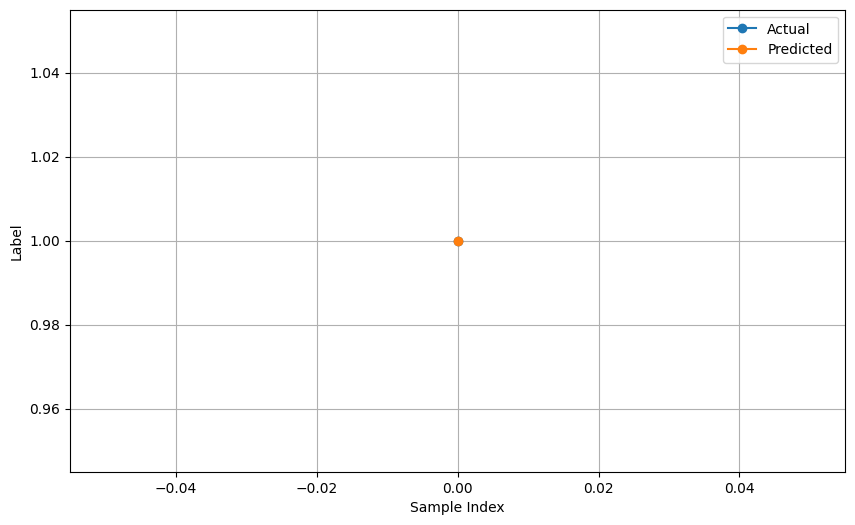

In [52]:
# Plot the actual vs predicted values
df.plot(kind='line', figsize=(10, 6), marker='o')
# plt.title(f'Model Predictions vs Actual (Accuracy: {accuracy * 100:.2f}%)')
plt.ylabel('Label')
plt.xlabel('Sample Index')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)

# Show plot
plt.show()